<a href="https://colab.research.google.com/github/upputhollanandini/ChronicKidneyDisease_ML/blob/main/ChronicKidneyDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ML/kidney_disease.csv')

In [ ]:
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0              ckd  
1              ckd  
2              ckd  
3              ckd  
4              ckd  
..             ...  
395         notckd  
396         notckd  
397         notckd  
398         notckd  
399         notckd  

[400 rows x 26 columns]

from matplotlib import pyplot as plt
data['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('rbc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('pc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('pcc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('ba').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='bp', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='sg', y='al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rbc')):
  _plot_series(series, series_name, i)
  fig.legend(title='rbc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pcc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pcc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ba')):
  _plot_series(series, series_name, i)
  fig.legend(title='ba', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
data['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pc'].value_counts()
    for x_label, grp in data.groupby('rbc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rbc')
_ = plt.ylabel('pc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pcc'].value_counts()
    for x_label, grp in data.groupby('pc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pc')
_ = plt.ylabel('pcc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ba'].value_counts()
    for x_label, grp in data.groupby('pcc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pcc')
_ = plt.ylabel('ba')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['htn'].value_counts()
    for x_label, grp in data.groupby('ba')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ba')
_ = plt.ylabel('htn')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['rbc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='rbc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['pc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='pc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['pcc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='pcc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['ba'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='ba', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.shape

(400, 26)

In [ ]:
data.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

from matplotlib import pyplot as plt
_df_0['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('rbc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('pc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('pcc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('pcv').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='age', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='bp', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='sg', y='al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rbc')):
  _plot_series(series, series_name, i)
  fig.legend(title='rbc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pcc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pcc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pcv')):
  _plot_series(series, series_name, i)
  fig.legend(title='pcv', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
_df_16['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pc'].value_counts()
    for x_label, grp in _df_20.groupby('rbc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rbc')
_ = plt.ylabel('pc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pcc'].value_counts()
    for x_label, grp in _df_21.groupby('pc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pc')
_ = plt.ylabel('pcc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pcv'].value_counts()
    for x_label, grp in _df_22.groupby('pcc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pcc')
_ = plt.ylabel('pcv')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['wc'].value_counts()
    for x_label, grp in _df_23.groupby('pcv')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pcv')
_ = plt.ylabel('wc')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['rbc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='id', y='rbc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['pc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='id', y='pc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['pcc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='id', y='pcc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['pcv'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='id', y='pcv', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
 data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

In [ ]:
data.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
data.info()

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
label=LabelEncoder()
data['classification']=label.fit_transform(data['classification'])
data

id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  yes   no  good   no   no   
1    notpresent  ...   38  6000  NaN   no   no   no  good   no   no   
2    notpresent  ...   31  7500  NaN   no  yes   no  poor   no  yes   
3    notpresent  ...   32  6700  3.9  yes   no   no  poor  yes  yes   
4    notpresent  ...   35  7300  4.6   no   no   no  good   no   no   
..          ...  ...  ...   ...  ...  ...  ...  ...   ...  ...  ...   
395  notpresent  ...   47  6700  4.9   no   no   no  good   no   no   
396  notpresent  ...   54  7800  6.2   no   no   no  good   no   no   
397  notpresent  ...   49  6600  5.4   no   no   no  good   no   no   
398  notpresent  ...   51  7200  5.9   no   no   no  good   no   no   
399  notpresent  ...   53  6800  6.1   no   no   no  good   no   no   

    classification  
0                0  
1                0  
2                0  
3                0  
4                0  
..             ...  
395              2  
396              2  
397              2  
398              2  
399              2  

[400 rows x 26 columns]

from matplotlib import pyplot as plt
data['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('rbc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('pc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('pcc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('ba').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='age', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='bp', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='sg', y='al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('rbc')):
  _plot_series(series, series_name, i)
  fig.legend(title='rbc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('pcc')):
  _plot_series(series, series_name, i)
  fig.legend(title='pcc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('ba')):
  _plot_series(series, series_name, i)
  fig.legend(title='ba', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
data['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pc'].value_counts()
    for x_label, grp in data.groupby('rbc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('rbc')
_ = plt.ylabel('pc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['pcc'].value_counts()
    for x_label, grp in data.groupby('pc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pc')
_ = plt.ylabel('pcc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['ba'].value_counts()
    for x_label, grp in data.groupby('pcc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('pcc')
_ = plt.ylabel('ba')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['htn'].value_counts()
    for x_label, grp in data.groupby('ba')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ba')
_ = plt.ylabel('htn')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['rbc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='rbc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['pc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='pc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['pcc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='pcc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['ba'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='id', y='ba', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder ,StandardScaler
c=['rbc',	'pc',	'pcc'	,'ba',	'htn',	'dm',	'cad','appet','pe','ane']
df=pd.get_dummies(data,columns=c,drop_first=True)
df

In [ ]:
numerical_columns = df.select_dtypes(include='number').columns
for col in numerical_columns:
    df[col].fillna(df[col].mean(), inplace=True)
df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df.fillna(df.mean(), inplace=True)

# Save the cleaned dataset
df.to_csv('cleaned_dataset.csv', index=False)
df

<ipython-input-11-9709e8dd7eb8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


id   age    bp     sg   al   su         bgr    bu   sc         sod  ...  \
0      0  48.0  80.0  1.020  1.0  0.0  121.000000  36.0  1.2  137.528754  ...   
1      1   7.0  50.0  1.020  4.0  0.0  148.036517  18.0  0.8  137.528754  ...   
2      2  62.0  80.0  1.010  2.0  3.0  423.000000  53.0  1.8  137.528754  ...   
3      3  48.0  70.0  1.005  4.0  0.0  117.000000  56.0  3.8  111.000000  ...   
4      4  51.0  80.0  1.010  2.0  0.0  106.000000  26.0  1.4  137.528754  ...   
..   ...   ...   ...    ...  ...  ...         ...   ...  ...         ...  ...   
395  395  55.0  80.0  1.020  0.0  0.0  140.000000  49.0  0.5  150.000000  ...   
396  396  42.0  70.0  1.025  0.0  0.0   75.000000  31.0  1.2  141.000000  ...   
397  397  12.0  80.0  1.020  0.0  0.0  100.000000  26.0  0.6  137.000000  ...   
398  398  17.0  60.0  1.025  0.0  0.0  114.000000  50.0  1.0  135.000000  ...   
399  399  58.0  80.0  1.025  0.0  0.0  131.000000  18.0  1.1  141.000000  ...   

     htn_yes  dm_\tyes dm_ yes dm_no dm_yes  cad_no  cad_yes  appet_poor  \
0          1         0       0     0      1       1        0           0   
1          0         0       0     1      0       1        0           0   
2          0         0       0     0      1       1        0           1   
3          1         0       0     1      0       1        0           1   
4          0         0       0     1      0       1        0           0   
..       ...       ...     ...   ...    ...     ...      ...         ...   
395        0         0       0     1      0       1        0           0   
396        0         0       0     1      0       1        0           0   
397        0         0       0     1      0       1        0           0   
398        0         0       0     1      0       1        0           0   
399        0         0       0     1      0       1        0           0   

     pe_yes  ane_yes  
0         0        0  
1         0        0  
2         0        1  
3         1        1  
4         0        0  
..      ...      ...  
395       0        0  
396       0        0  
397       0        0  
398       0        0  
399       0        0  

[400 rows x 30 columns]

from matplotlib import pyplot as plt
df['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['bp'].plot(kind='hist', bins=20, title='bp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['sg'].plot(kind='hist', bins=20, title='sg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='id', y='age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='age', y='bp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='bp', y='sg', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='sg', y='al', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['age']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('age')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['bp']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('bp')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['sg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('sg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['al']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('al')

from matplotlib import pyplot as plt
df['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['age'].plot(kind='line', figsize=(8, 4), title='age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['bp'].plot(kind='line', figsize=(8, 4), title='bp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['sg'].plot(kind='line', figsize=(8, 4), title='sg')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df.isnull().sum()

id                  0
age                 0
bp                  0
sg                  0
al                  0
su                  0
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc                130
classification      0
rbc_normal          0
pc_normal           0
pcc_present         0
ba_present          0
htn_yes             0
dm_\tyes            0
dm_ yes             0
dm_no               0
dm_yes              0
cad_no              0
cad_yes             0
appet_poor          0
pe_yes              0
ane_yes             0
dtype: int64

In [ ]:
numerical_columns = ['pcv', 'wc', 'rc']
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

df.to_csv('cleaned_dataset.csv', index=False)

In [ ]:
df.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
classification    0
rbc_normal        0
pc_normal         0
pcc_present       0
ba_present        0
htn_yes           0
dm_\tyes          0
dm_ yes           0
dm_no             0
dm_yes            0
cad_no            0
cad_yes           0
appet_poor        0
pe_yes            0
ane_yes           0
dtype: int64

In [ ]:
x=df.drop(['classification'],axis=1)
y=df['classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train)

      id   age     bp        sg        al        su         bgr     bu   sc  \
157  157  62.0   70.0  1.025000  3.000000  0.000000  122.000000   42.0  1.7   
109  109  54.0   70.0  1.017408  1.016949  0.450142  233.000000   50.1  1.9   
17    17  47.0   80.0  1.017408  1.016949  0.450142  114.000000   87.0  5.2   
347  347  43.0   60.0  1.025000  0.000000  0.000000  108.000000   25.0  1.0   
24    24  42.0  100.0  1.015000  4.000000  0.000000  148.036517   50.0  1.4   
..   ...   ...    ...       ...       ...       ...         ...    ...  ...   
71    71  46.0   60.0  1.010000  1.000000  0.000000  163.000000   92.0  3.3   
106  106  50.0   90.0  1.017408  1.016949  0.450142   89.000000  118.0  6.1   
270  270  23.0   80.0  1.025000  0.000000  0.000000  111.000000   34.0  1.1   
348  348  38.0   80.0  1.020000  0.000000  0.000000   99.000000   19.0  0.5   
102  102  17.0   60.0  1.010000  0.000000  0.000000   92.000000   32.0  2.1   

            sod  ...  htn_yes  dm_\tyes  dm_ yes  d

In [ ]:
y_train

157    0
109    0
17     0
347    2
24     0
      ..
71     0
106    0
270    2
348    2
102    0
Name: classification, Length: 280, dtype: int64

**Decision Tree**

In [ ]:
import numpy as np
def find_entropy(df):
  Class = df.keys()[-1]
  values = df[Class].unique()
  entropy = 0
  for value in values:
    prob = df[Class].value_counts()[value]/len(df[Class])
    entropy += -prob * np.log2(prob)
  return np.float(entropy)

In [ ]:
def find_entropy_attribute(df,attribute):
  Class=df.keys()[-1]
  target_values=df[Class].unique()
  attribute_values=df[attribute].unique()
  avg_entropy=0
  for value in attribute_values:
    entropy=0
    for value1 in target_values:
      num=len(df[attribute][df[attribute]==value][df[Class]==value1])
      den=len(df[attribute][df[attribute]==value])
      prob=num/den
      entropy+=-prob*np.log2(prob+0.000001)
    avg_entropy+=(den/len(df))*entropy
  return np.float(avg_entropy)

In [ ]:
def find_winner(df):
  IG = []
  for key in df.keys()[:-1]:
    IG.append(find_entropy(df) - find_entropy_attribute(df, key))
  return df.keys()[:-1][np.argmax(IG)]

In [ ]:
def get_subtable(df, attribute, value):
  return df[df[attribute] == value].reset_index(drop = True)

In [ ]:
def buildtree(df, tree = None):
  node = find_winner(df)
  attvalue = np.unique(df[node])
  Class = df.keys()[-1]
  if tree is None:
    tree = {}
    tree[node] = {}
  for value in attvalue:
    subtable = get_subtable(df,node,value)
    Clvalue, counts = np.unique(subtable[Class], return_counts = True)
    if len(counts) == 1:
      tree[node][value] = Clvalue[0]
    else:
      tree[node][value] = buildtree(subtable)
  return tree

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/ML/kidney_disease.csv')

In [ ]:
tree = buildtree(df)
import pprint
pprint.pprint(tree)

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
clf = DecisionTreeClassifier()
# Fitting the model
clf = clf.fit(x_train, y_train)
# Making predictions
y_pred = clf.predict(x_test)
# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9916666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           2       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120


Confusion Matrix:
 [[76  0]
 [ 1 43]]


[Text(0.625, 0.9, 'x[0] <= 250.0\ngini = 0.479\nsamples = 280\nvalue = [172, 2, 106]'),
 Text(0.5, 0.7, 'x[14] <= 2.55\ngini = 0.023\nsamples = 174\nvalue = [172, 2, 0]'),
 Text(0.25, 0.5, 'x[0] <= 67.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.75, 0.5, 'x[7] <= 17.5\ngini = 0.012\nsamples = 170\nvalue = [169, 1, 0]'),
 Text(0.625, 0.3, 'x[17] <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 164\nvalue = [164, 0, 0]'),
 Text(0.75, 0.7, 'gini = 0.0\nsamples = 106\nvalue = [0, 0, 106]')]

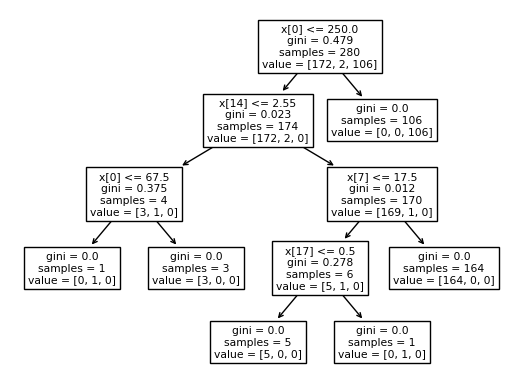

In [ ]:
# Visualizing the decision tree
tree.plot_tree(clf)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
db=GaussianNB()
db.fit(x_train,y_train)

GaussianNB()

In [ ]:
predections = db.predict(x_test)
predections

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 2, 2, 2])

In [ ]:
accuracy=accuracy_score(y_test,predections)
confusion=confusion_matrix(y_test,predections)
classification=classification_report(y_test,predections)
print(accuracy)
print(confusion)
print(classification)

0.9583333333333334
[[72  4]
 [ 1 43]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        76
           2       0.91      0.98      0.95        44

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_predictions=classifier.predict(x_test)
y_predictions

array([2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0,
       2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 2])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy=accuracy_score(y_test,y_predictions)
confusion=confusion_matrix(y_test,y_predictions)
classifications=classification_report(y_test,y_predictions)
print(accuracy)
print(confusion)
print(classifications)

0.925
[[69  7]
 [ 2 42]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        76
           2       0.86      0.95      0.90        44

    accuracy                           0.93       120
   macro avg       0.91      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



**Random Forest Algorithm**

https://colab.research.google.com/drive/1d_GFJybhnclX5kJQtm9D5Kxxj5tvNbKU?usp=sharing#scrollTo=WVai-L4SD2uF

**Logistic Regression**

https://colab.research.google.com/drive/1Pg5CJCpjoDGB5Rf8PjVxHNWtUlW-hq0G